In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
#随机森林
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

In [14]:
q1 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/qsos1.csv")
q2 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/stars2r50.csv")
q3 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/qsovali.csv")
q4 = pd.read_csv("/Users/ShuyanLi/desktop/Astronomy project/starvali.csv")

In [15]:
q1.head()

,gw1,rw1,iw1,zw1,yw1,w12,ipk,zpk,w23,ra,dec,class
0,0.1291,0.0442,0.0763,-0.1097,-0.0390,0.645,-0.0798,-0.1306,1.347,130.182022,35.254021,QSO
1,1.1357,1.1314,1.1898,1.2547,1.0329,0.314,-0.1875,0.1815,0.872,211.456385,39.662792,QSO
2,0.6357,0.5618,0.5277,0.1935,0.2482,0.275,-0.0891,-0.0772,1.150,154.642487,55.115891,QSO
3,2.2020,2.1002,2.0227,2.0110,1.4642,0.564,-0.0226,0.0504,1.303,355.534149,14.697548,QSO
4,0.7686,0.7570,0.5810,0.7206,0.5224,0.732,-0.0889,-0.1298,1.017,145.067429,16.637278,QSO


In [16]:
data1 = pd.concat([q1, q2], ignore_index = True)
#merge q1 and q2#
data2 = pd.concat([q3, q4], ignore_index = True)
#merge q3 and q4#

In [17]:
data1.head()

,gw1,rw1,iw1,zw1,yw1,w12,ipk,zpk,w23,ra,dec,class
0,0.1291,0.0442,0.0763,-0.1097,-0.0390,0.645,-0.0798,-0.1306,1.347,130.182022,35.254021,QSO
1,1.1357,1.1314,1.1898,1.2547,1.0329,0.314,-0.1875,0.1815,0.872,211.456385,39.662792,QSO
2,0.6357,0.5618,0.5277,0.1935,0.2482,0.275,-0.0891,-0.0772,1.150,154.642487,55.115891,QSO
3,2.2020,2.1002,2.0227,2.0110,1.4642,0.564,-0.0226,0.0504,1.303,355.534149,14.697548,QSO
4,0.7686,0.7570,0.5810,0.7206,0.5224,0.732,-0.0889,-0.1298,1.017,145.067429,16.637278,QSO


In [18]:
target_names=np.array(['QSO','STAR'])

In [19]:
train = data1
test = data2

In [20]:
train.sort_index(inplace=True)
test.sort_index(inplace=True)

In [21]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 510000
Number of observations in the test data: 20000


In [22]:
# Create a list of the feature column's names
features = train.columns[:8]

# View features
features

Index(['gw1', 'rw1', 'iw1', 'zw1', 'yw1', 'w12', 'ipk', 'zpk'], dtype='object')

In [23]:
pd.factorize(train['class'])

(array([0, 0, 0, ..., 1, 1, 1]), Index(['QSO', 'STAR'], dtype='object'))

In [24]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['class'])[0]

# View target
y

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
train['class']

0          QSO
1          QSO
2          QSO
3          QSO
4          QSO
5          QSO
6          QSO
7          QSO
8          QSO
9          QSO
10         QSO
11         QSO
12         QSO
13         QSO
14         QSO
15         QSO
16         QSO
17         QSO
18         QSO
19         QSO
20         QSO
21         QSO
22         QSO
23         QSO
24         QSO
25         QSO
26         QSO
27         QSO
28         QSO
29         QSO
          ... 
509970    STAR
509971    STAR
509972    STAR
509973    STAR
509974    STAR
509975    STAR
509976    STAR
509977    STAR
509978    STAR
509979    STAR
509980    STAR
509981    STAR
509982    STAR
509983    STAR
509984    STAR
509985    STAR
509986    STAR
509987    STAR
509988    STAR
509989    STAR
509990    STAR
509991    STAR
509992    STAR
509993    STAR
509994    STAR
509995    STAR
509996    STAR
509997    STAR
509998    STAR
509999    STAR
Name: class, Length: 510000, dtype: object

In [26]:
clf = RandomForestClassifier(n_estimators=100, 
#                              max_features=1,
#                              max_depth=1,
                             n_jobs=8,
#并行处理的几何数
                             random_state=15,
                             #随机数种子
                             class_weight="balanced"
#                              ,
#                              class_weight={0:1,1:20,2:5}
                            )
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=8, oob_score=False, random_state=15,
            verbose=0, warm_start=False)

In [27]:
y_test = pd.factorize(test['class'])[0]
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
test.iloc[:,:8].values

array([[ 2.1426000e+00,  1.8030000e+00,  1.6769000e+00, ...,
         3.5200000e-01, -7.9100000e-02, -2.0000000e-03],
       [ 1.9530000e+00,  2.0130000e+00,  1.7887000e+00, ...,
         4.2900000e-01,  5.6200000e-02,  6.2800000e-02],
       [ 1.5563000e+00,  1.1660000e+00,  5.4010000e-01, ...,
         4.5900000e-01, -5.4300000e-02,  5.3500000e-02],
       ...,
       [ 7.3740005e-01, -2.2710037e-01, -6.0920143e-01, ...,
        -6.7499924e-01, -5.2600860e-02, -6.4800260e-02],
       [-1.5069962e-01, -7.7059937e-01, -9.9059963e-01, ...,
        -6.8600080e-01, -5.3000450e-02, -5.3500175e-02],
       [ 3.5089874e-01, -4.3050003e-01, -7.4749947e-01, ...,
        -7.2399900e-01, -6.0899734e-02, -7.2601320e-02]])

In [29]:
y_pred = clf.predict_proba(test.iloc[:,:8].values)

y_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.85, 0.15],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [30]:
range(len(y_pred))

range(0, 20000)

In [32]:
y_scores = np.array([y_pred[i][0] if y_test[i]==0 else y_pred[i][1] for i in range(len(y_pred))])
y_scores

array([1.  , 1.  , 0.85, ..., 1.  , 1.  , 1.  ])

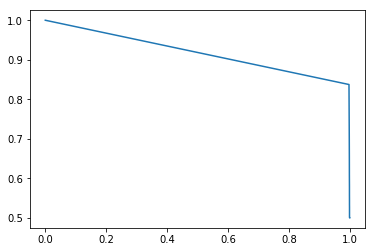

In [33]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(recall,precision)
plt.show()

In [34]:
scores=cross_val_score(clf,train[features],y,cv=5)
print("交叉验证准确率：",scores)

交叉验证准确率： [0.99928431 0.99942157 0.99922549 0.99921569 0.99921569]


In [35]:
# Create actual english names for the plants for each predicted plant class
preds = target_names[clf.predict(test[features])]
# Create confusion matrix
pd.crosstab(test['class'], preds, rownames=['Actual classes'], colnames=['Predicted classes'])

Predicted classes,QSO,STAR
Actual classes,,
QSO,9953,47
STAR,3,9997


In [36]:
test['preds'] = preds
preds

array(['QSO', 'QSO', 'QSO', ..., 'STAR', 'STAR', 'STAR'], dtype='<U4')

In [37]:
len(test[(test['preds']=='QSO')&(test['class']=='QSO')])

9953

In [38]:
len(test[(test['preds']=='STAR')&(test['class']=='STAR')])

9997